<a href="https://colab.research.google.com/github/kmshravani/LinearRegression/blob/main/Linear_Regression_using_StatsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting a line to a dataset of observations ; then use this line to predict for unobserved values

y = mx+c 

# internally How it Works 
ordinary least squares(OLS) - minimizes squared error betn each point and line 
slope - correlation betn two variables times SD of Y and all divided by SD of X
interept  - mean(Y) - slope*mean(X)

Least squares minimizes sum of squared errors aka Maximum Likelihood Estimation
usually this is used in Linear Regression

Gradient Descent alternate way of least squares - fancy ; computationally expensive
Least Square will be enough in most cases

LR using Least Square vs LR using Gradient Descent and compare ; 

# How good are your results?
measuring error with r-squared aka coefficent of determinations

fraction of total variation in Y that is captured in model; that variance is equal on both sides of the graph line
formula = 1- (sum of squared errors/sum of squared variation from mean )

r-squared value ranges from 0 to 1 
0 is bad(variance not captured), 1 is good (all variance captured) 


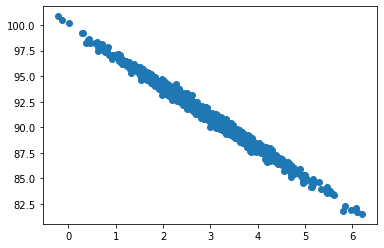

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)  #random samples from a normal (Gaussian) distribution.
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

scatter(pageSpeeds, purchaseAmount)



In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)
print(slope, intercept, r_value, p_value, std_err)

-2.9956578006980807 99.99303273321254 -0.9952276698983181 0.0 0.009297495065508239


In [3]:
r_value ** 2

0.9904781149312357

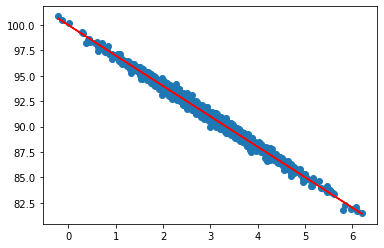

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept  #mx+c

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

Is polynomial regression the same as multiple regression, i.e. values are only raised to powers?

in polynomial regression, you're just doing a multiple regression with multiple transformations of a single variable

Create your first regression

Importing libraries and csv file

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
url = 'https://raw.githubusercontent.com/kmshravani/LinearRegression/main/1.01.%2BSimple%2Blinear%2Bregression.csv'
df = pd.read_csv(url)
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Define the dependent and independent variables

In [7]:
y = df['GPA']
x1 = df['SAT']

Explore the Data

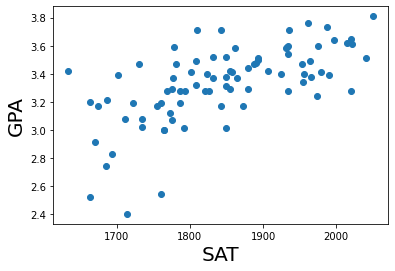

In [8]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

Regression itself

In [9]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()    #fit will apply a specific estimate technique (here,OLS) to obtain the fit of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        07:45:04   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpret the Rgression Table**

from the coefficients part above, b0= 0.275 and b1=0.0017
b0 is aka constant or coefficient 

if b0 is 0 then line through origin
if b1 is 0 then yhat  b0- not useful

std error = accuracy of model; 

lower std error->better the estimate
t-statistic, p-value - hypothesis

Hypothesis is H0: coeff is 0?


p-value below 0.05, variable significant ;

 p=0.503 means intercept coefficient is significantly different from 0 

 p=0.00 means coefficent(x) it is significantly different from 0 

**OLS**
dep variable = GPA here 

Model = OLS 
Method = Least Squares

OLS -> gives us a line with minimum error ; this line is closest to all points;  that means better regression



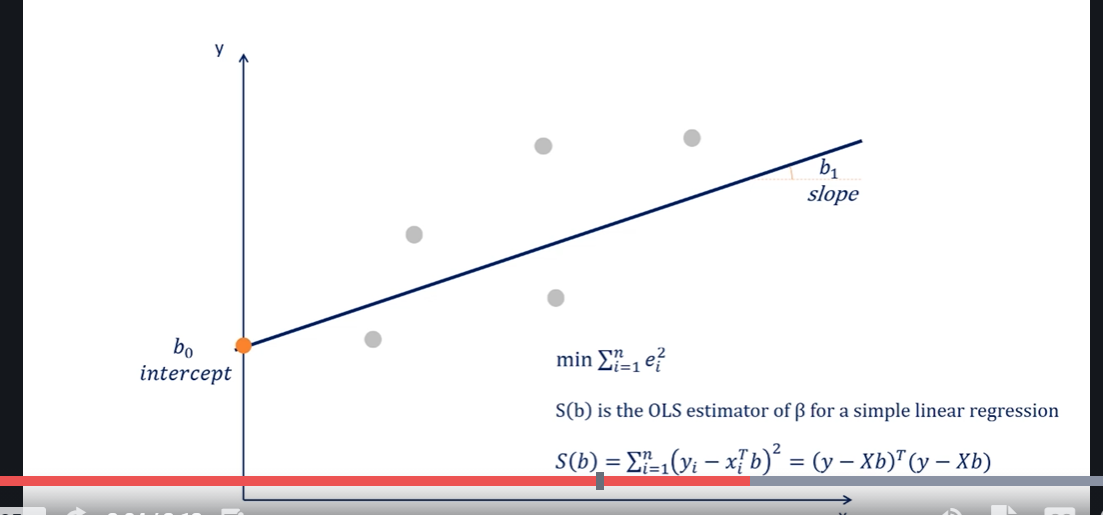

GPA = 0.275 + 0.0017*SAT - regression eq

Other methods for LR line - 

OLS
Generalized Least Squares 
Maximum Likelihood Estimation
Bayesian Regr
Kernel Regr
Gaussian process Regr

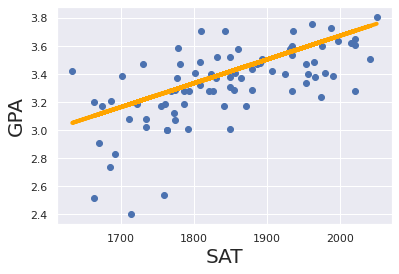

In [12]:
plt.scatter(x1,y)
yhat = 0.0017*x1+ 0.275 #y = b1x1+b0
fig = plt.plot(x1,yhat,lw=4, c='orange',label='Regression Line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
# plt.xlim(0)
# plt.ylim(0)
plt.show()


Sun of squares total = sum of squares regression + sum of squares errors

Seaborn

In [11]:
import seaborn as sns
sns.set()
#Restart and Run all cells

R-squared 

We did the regression analysis and predicted yhat. We also know this ->
Total variability(SST) = Explained variability(SSR) + Unexplained variability(SSE)

We also know that smaller reg error then better the regression 

One measure to say how to goodness of this fit 
R-squared 
1. R-squared = SSR / SST
2. Relative measure that takes values from 0 to 1 ; 0 means your regression doesn't explain any variability and 1 means regression explain entire variability
3. usually values range from 0.2 to 0.9
4. there is no guessing a good R-squared value because it depends on problem at hand ; physics/chemistry problems -> 0.7 to 0.9 and social/economics/finance/psychology 0.2 is better
5. Example -> predict income will depend on many factors like edu, family, country, grades etc ; when including these factors in the model: do so carefully
6. in this above example , r-sq value is 0.40 ... that means regr is not perfect, we should aim towards 0.9 so we should include other factors

The R-squared shows how much of the total variability of the dataset is explained by your regression model. This may be expressed as: *how well your model fits your data*. It is incorrect to say your regression line fits the data, as the line is the geometrical representation of the regression equation. It also incorrect to say the data fits the model or the regression line, as you are trying to explain the data with a model, not vice versa.